In [ ]:
'''
Example TTD calculations.
'''

In [110]:
import pandas as pd
import tqdm
import numpy as np
from collections import OrderedDict
from collections import defaultdict
import pickle
import glob
from matplotlib import pyplot as plt
%matplotlib inline

import plotly
import plotly.graph_objects as go

In [114]:
def dd():
    return defaultdict(int)

concept_id_mapper = defaultdict(dd) # dd is a module-level function

with open('../../output/created_files/ohdsi_cumc_2021q1r2_common_symptoms.pickle', 'rb') as handle:
    concept_id_mapper = pickle.load(handle)

In [5]:
db = 'ohdsi_cumc_2021q1r2'
summary_fp = '../../output/summaries/' + db + '/'

In [6]:
final = pd.read_csv('../../output/created_files/' + db + '_common_symptom_tfidf_final.csv')

In [38]:
cohort_descriptions = pd.read_csv('../csv/phenotype_lookups_final.csv')

In [45]:
cohorts    = []
avg_diffs  = []
avg_female = []
avg_male   = []
std_female = []
std_male   = []
lookback   = []

raw_female = []
raw_male   = []
valids     = []

for summary_file in tqdm.tqdm(glob.glob(summary_fp + '*')):
    summary = pd.read_csv(summary_file)
    summary['avg_TTD_diff_days'] = summary['avg_TTD_females_days'] - summary['avg_TTD_males_days']
    cohort_id = str(summary.cohort_definition_id.values[0])
    cohorts.append(cohort_id)
    int_cohort_id = int(cohort_id)
    
    # top 50
    valid = final.sort_values(by=cohort_id, ascending=False)['condition_concept_id'][0:50].values
    avg_diffs.append(np.mean(summary[(summary.cohort_definition_id == int_cohort_id) & (summary.condition_concept_id.isin(valid))]['avg_TTD_diff_days']))
    avg_female.append(np.mean(summary[(summary.cohort_definition_id == int_cohort_id) & (summary.condition_concept_id.isin(valid))]['avg_TTD_females_days']))
    avg_male.append(np.mean(summary[(summary.cohort_definition_id == int_cohort_id) & (summary.condition_concept_id.isin(valid))]['avg_TTD_males_days']))
    std_female.append(np.std(summary[(summary.cohort_definition_id == int_cohort_id) & (summary.condition_concept_id.isin(valid))]['avg_TTD_females_days']))
    std_male.append(np.std(summary[(summary.cohort_definition_id == int_cohort_id) & (summary.condition_concept_id.isin(valid))]['avg_TTD_males_days']))
    lookback.append(cohort_descriptions[cohort_descriptions.Cohort_ID == int_cohort_id].Lookback.values[0])
    
    raw_female.append(summary[(summary.cohort_definition_id == int_cohort_id) & (summary.condition_concept_id.isin(valid))]['avg_TTD_females_days'].values)    
    raw_male.append(summary[(summary.cohort_definition_id == int_cohort_id) & (summary.condition_concept_id.isin(valid))]['avg_TTD_males_days'].values)
    valids.append(summary[(summary.cohort_definition_id == int_cohort_id) & (summary.condition_concept_id.isin(valid))]['condition_concept_id'].values)

100%|████████████████████████████████████████████████████████████████████████████████| 114/114 [00:02<00:00, 55.15it/s]


In [48]:
TTD_results = pd.DataFrame([cohorts, avg_diffs, avg_female, std_female, avg_male, std_male, lookback]).transpose()

In [49]:
# df = df.rename(columns={'Unnamed: 0' : 'cohort_id'})
TTD_results.rename(columns={0:'cohort_id', 1:'avg_diffs_TTD', 2:'avg_female_TTD', 3:'std_female_TTD', 4:'avg_male_TTD', 5:'std_male_TTD', 6:'lookback'}, inplace=True)

In [50]:
TTD_results

,cohort_id,avg_diffs_TTD,avg_female_TTD,std_female_TTD,avg_male_TTD,std_male_TTD,lookback
0,11111,12.324736,361.517622,125.458164,349.192887,124.689072,3
1,11112,25.284163,305.460554,123.391416,280.17639,77.38726,3
2,11113,26.365483,315.778249,122.53479,289.412766,91.620201,3
3,11114,12.309168,335.251282,97.852787,322.942114,160.976834,3
4,11115,0.264008,347.291547,98.205295,347.027539,91.258526,3
...,...,...,...,...,...,...,...
109,11229,18.868182,226.998513,108.472913,208.130331,106.326811,1
110,11230,-11.13833,273.607916,121.098937,284.746245,209.895276,3
111,11231,22.590223,366.539216,140.906401,343.948993,154.679712,3
112,11232,12.413836,231.320171,113.579658,218.906335,108.330215,1


Text(0.5, 1.0, 'CUIMC: Aggregating mean TTD differences:\nTop 50 common symptoms, 66 phenotypes')

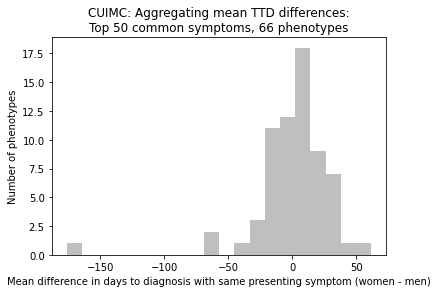

In [52]:
plt.hist(TTD_results[TTD_results.lookback == 3].avg_diffs_TTD, bins=20, color='gray', alpha=0.5)
plt.xlabel('Mean difference in days to diagnosis with same presenting symptom (women - men)')
plt.ylabel('Number of phenotypes')
plt.title('CUIMC: Aggregating mean TTD differences:\nTop 50 common symptoms, ' + str(len(TTD_results[TTD_results.lookback == 3])) + ' phenotypes')

Text(0.5, 1.0, 'CUIMC: Aggregating mean TTD differences:\nTop 50 common symptoms, 16 phenotypes')

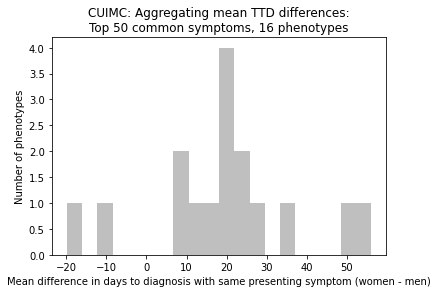

In [53]:
plt.hist(TTD_results[TTD_results.lookback == 10].avg_diffs_TTD, bins=20, color='gray', alpha=0.5)
plt.xlabel('Mean difference in days to diagnosis with same presenting symptom (women - men)')
plt.ylabel('Number of phenotypes')
plt.title('CUIMC: Aggregating mean TTD differences:\nTop 50 common symptoms, ' + str(len(TTD_results[TTD_results.lookback == 10])) + ' phenotypes')

Text(0.5, 1.0, 'CUIMC: Aggregating mean TTD differences:\nTop 50 common symptoms, 32 phenotypes')

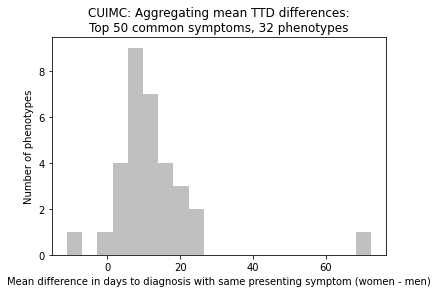

In [54]:
plt.hist(TTD_results[TTD_results.lookback == 1].avg_diffs_TTD, bins=20, color='gray', alpha=0.5)
plt.xlabel('Mean difference in days to diagnosis with same presenting symptom (women - men)')
plt.ylabel('Number of phenotypes')
plt.title('CUIMC: Aggregating mean TTD differences:\nTop 50 common symptoms, ' + str(len(TTD_results[TTD_results.lookback == 1])) + ' phenotypes')

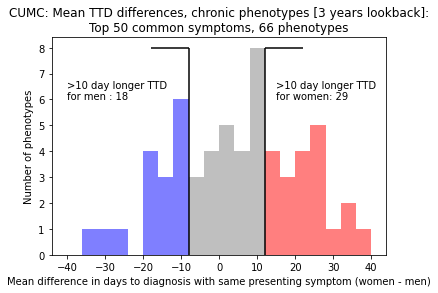

In [64]:
lookback = 3

N, bins, patches = plt.hist(TTD_results[TTD_results.lookback == lookback].avg_diffs_TTD, bins=20, color='gray', alpha=0.5, range = (-40, 40))

num_phenos = len(TTD_results[TTD_results.lookback == lookback].avg_diffs_TTD)

for i, bin_val in enumerate(bins):
    if bin_val > 9.1:
        try:
            patches[i].set_facecolor('red')
        except IndexError:
            continue

for i, bin_val in enumerate(bins):
    if bin_val < -10:
        try:
            patches[i].set_facecolor('blue')
        except IndexError:
            continue
            
num_wom = str(sum(TTD_results[TTD_results.lookback == lookback].avg_diffs_TTD > 10))
num_men = str(sum(TTD_results[TTD_results.lookback == lookback].avg_diffs_TTD < -10))

# plt.vlines(x=10, ymin=0, ymax=300)
plt.title('CUMC: Mean TTD differences, chronic phenotypes [3 years lookback]:\nTop 50 common symptoms, ' + str(num_phenos) + ' phenotypes')
# plt.legend(loc='upper left')
plt.text(-40, 6, '>10 day longer TTD\nfor men : ' + num_men) # 350
plt.text(15, 6, '>10 day longer TTD\nfor women: ' + num_wom) # 300
plt.xlabel('Mean difference in days to diagnosis with same presenting symptom (women - men)')
plt.ylabel('Number of phenotypes')

# ax = plt.axes()
# ax.set(facecolor = '#ffffff')

plt.vlines(x=12, ymin=0, ymax=8, color='black')
plt.vlines(x=-8, ymin=0, ymax=8, color='black')

plt.hlines(y=8, xmin=-18, xmax=-8, color='black')
plt.hlines(y=8, xmin=12, xmax=22, color='black')

# fig = plt.gcf()
# fig.set_size_inches(3, 4)

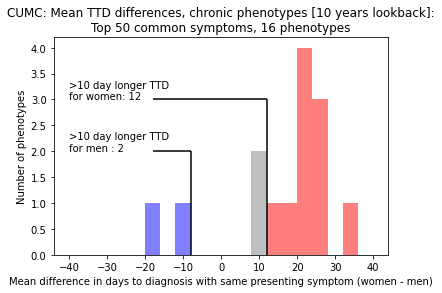

In [69]:
lookback = 10

N, bins, patches = plt.hist(TTD_results[TTD_results.lookback == lookback].avg_diffs_TTD, bins=20, color='gray', alpha=0.5, range = (-40, 40))

num_phenos = len(TTD_results[TTD_results.lookback == lookback].avg_diffs_TTD)

for i, bin_val in enumerate(bins):
    if bin_val > 9.1:
        try:
            patches[i].set_facecolor('red')
        except IndexError:
            continue

for i, bin_val in enumerate(bins):
    if bin_val < -10:
        try:
            patches[i].set_facecolor('blue')
        except IndexError:
            continue
            
num_wom = str(sum(TTD_results[TTD_results.lookback == lookback].avg_diffs_TTD > 10))
num_men = str(sum(TTD_results[TTD_results.lookback == lookback].avg_diffs_TTD < -10))

# plt.vlines(x=10, ymin=0, ymax=300)
plt.title('CUMC: Mean TTD differences, chronic phenotypes [10 years lookback]:\nTop 50 common symptoms, ' + str(num_phenos) + ' phenotypes')
# plt.legend(loc='upper left')
plt.text(-40, 2, '>10 day longer TTD\nfor men : ' + num_men) # 350
plt.text(-40, 3, '>10 day longer TTD\nfor women: ' + num_wom) # 300
plt.xlabel('Mean difference in days to diagnosis with same presenting symptom (women - men)')
plt.ylabel('Number of phenotypes')

# ax = plt.axes()
# ax.set(facecolor = '#ffffff')

plt.vlines(x=12, ymin=0, ymax=3, color='black') # womens
plt.vlines(x=-8, ymin=0, ymax=2, color='black') # mens

plt.hlines(y=2, xmin=-18, xmax=-8, color='black') #mens
plt.hlines(y=3, xmin=-18, xmax=12, color='black') #womens

# fig = plt.gcf()
# fig.set_size_inches(3, 4)

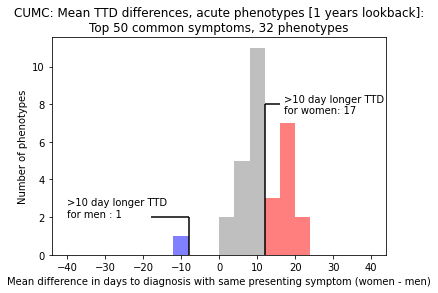

In [81]:
lookback = 1

N, bins, patches = plt.hist(TTD_results[TTD_results.lookback == lookback].avg_diffs_TTD, bins=20, color='gray', alpha=0.5, range = (-40, 40))

num_phenos = len(TTD_results[TTD_results.lookback == lookback].avg_diffs_TTD)

for i, bin_val in enumerate(bins):
    if bin_val > 9.1:
        try:
            patches[i].set_facecolor('red')
        except IndexError:
            continue

for i, bin_val in enumerate(bins):
    if bin_val < -10:
        try:
            patches[i].set_facecolor('blue')
        except IndexError:
            continue
            
num_wom = str(sum(TTD_results[TTD_results.lookback == lookback].avg_diffs_TTD > 10))
num_men = str(sum(TTD_results[TTD_results.lookback == lookback].avg_diffs_TTD < -10))

# plt.vlines(x=10, ymin=0, ymax=300)
plt.title('CUMC: Mean TTD differences, acute phenotypes [1 years lookback]:\nTop 50 common symptoms, ' + str(num_phenos) + ' phenotypes')
# plt.legend(loc='upper left')
plt.text(-40, 2, '>10 day longer TTD\nfor men : ' + num_men) # 350
plt.text(17, 7.5, '>10 day longer TTD\nfor women: ' + num_wom) # 300
plt.xlabel('Mean difference in days to diagnosis with same presenting symptom (women - men)')
plt.ylabel('Number of phenotypes')

# ax = plt.axes()
# ax.set(facecolor = '#ffffff')

plt.vlines(x=12, ymin=0, ymax=8, color='black') # womens
plt.vlines(x=-8, ymin=0, ymax=2, color='black') # mens

plt.hlines(y=2, xmin=-18, xmax=-8, color='black') #mens
plt.hlines(y=8, xmin=12, xmax=16, color='black') #womens

# fig = plt.gcf()
# fig.set_size_inches(3, 4)

In [104]:
TTD_results.head()

,cohort_id,avg_diffs_TTD,avg_female_TTD,std_female_TTD,avg_male_TTD,std_male_TTD,lookback
0,11111,12.324736,361.517622,125.458164,349.192887,124.689072,3
1,11112,25.284163,305.460554,123.391416,280.17639,77.38726,3
2,11113,26.365483,315.778249,122.53479,289.412766,91.620201,3
3,11114,12.309168,335.251282,97.852787,322.942114,160.976834,3
4,11115,0.264008,347.291547,98.205295,347.027539,91.258526,3


In [82]:
cohort_descriptions.head()

,Cohort_ID,ATLAS_ID,HERA_ID,Label,Short,"Category [WHO, from AAPC and ICD-10 grouping]",ICD-10,Acute or Chronic,Delay,Lookback
0,11111,2563,24134003,"Neck pain cohort: First occurrence of ""neck ...",Neck pain,Diseases of the musculoskeletal system and con...,M54.2,Chronic,NaN,3
1,11112,2564,24609003,Hypoglycemia disorder incident cohort: First...,Hypoglycemia,"Endocrine, nutritional and metabolic diseases",E16.2,Chronic,?,3
2,11113,2565,31317003,Dysphagia incident cohort: First occurrence ...,Dysphagia,"Symptoms, signs and abnormal clinical and labo...",R13,Chronic,NaN,3
3,11114,2566,31967003,Nausea Events All Events of referent concept...,Nausea,"Symptoms, signs and abnormal clinical and labo...",R11.0,Chronic,NaN,3
4,11115,2567,75860003,Constipation Events: all occurrence of refer...,Constipation,Diseases of the digestive system,K59.0,Chronic,NaN,3


In [125]:
y_data = [cohort_descriptions[cohort_descriptions.Cohort_ID == int(x)].Short.values[0] for x in TTD_results[TTD_results.lookback == 3].cohort_id]
x_data = []
hoverinfo = []

for i, ele in TTD_results.iterrows():
    if ele.lookback == 3:
        # print(i)
        x = (raw_female[i], raw_male[i])
        x_data.append(x[0] - x[1])
        tmp = []
        for j in valids[i]:
            tmp.append(concept_id_mapper[j])
        hoverinfo.append(tmp)

In [126]:
len(y_data), len(x_data), len(hoverinfo)

(66, 66, 66)

In [133]:
# https://plotly.com/python/box-plots/
# NBA example

# colors = ['#00b3be', '#92453c', '#e093bf', '#da3c8c', '#43ae41', '#33519d', '#fbb97a', '#9f9cce', '#833a8e',
#           '#595454', '#0e7989', '#678a4e', '#8a1e5d', '#f7db17', '#18562a', '#f4771e', '#242466', '#e91c20']

y_data = [cohort_descriptions[cohort_descriptions.Cohort_ID == int(x)].Short.values[0] for x in TTD_results[TTD_results.lookback == 3].cohort_id]
x_data = []
hoverinfo = []

for i, ele in TTD_results.iterrows():
    if ele.lookback == 3:
        # print(i)
        x = (raw_female[i], raw_male[i])
        x_data.append(x[0] - x[1])
        tmp = []
        for j in valids[i]:
            tmp.append(concept_id_mapper[j])
        hoverinfo.append(tmp)

# colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
#           'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']

fig = go.Figure()

for xd, yd, hover in zip(x_data, y_data, hoverinfo):
        fig.add_trace(go.Box(
            x=xd,
            name=yd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.6,
            # fillcolor=cls,
            line_width=3,
            hovertext=hover,
            marker=dict(
                size=4,
            ))
        )
        
        fig.update_traces(quartilemethod="inclusive")

fig.update_layout(
    yaxis_type='category',
    width = 600,
    height = 1200,
    title='TTD difference between women and men top 50 most relevant symptoms with 3-year phenotypes, CUIMC',
    yaxis=dict(
        title='Phenotype',
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=1,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    xaxis=dict(
        title='Time to diagnosis difference for the same symptom (women - men, days)'
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False,
    # font=dict(size=20,)
)

# fig.update_yaxes(title_font_size=28)

# fig.update_layout(
#     font_family="DejaVu Sans",
#     font_color="blue",
#     title_font_family="Times New Roman",
#     title_font_color="red",
#     legend_title_font_color="green"
# )

fig.write_html("../../output/graphs/cumc_top50_lookback_3.html")

# fig.write_html("../html/prev_diff_ICD10-CM.html")
fig.show()

# fig.update_layout(xaxis_range=[-150,150])
# fig.write_html("../html/mdcd_top50_cut.html")